In [ ]:
## https://www.kaggle.com/datasets/shivan118/hranalysis   datset source

<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  LOAD LIBRARY & DATA
</div>



In [592]:
import pandas as pd
import chardet
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

### Find current working derectory


In [593]:
import os
current_directory = os.getcwd()
print(current_directory)

F:\Akhil\KPIs


#### Find encoding for csv file & laod dataset

In [594]:

with open("../datasets/test_2umaH9m.csv", 'rb') as f:
    result = chardet.detect(f.read())
print(result)
data = pd.read_csv("../datasets/test_2umaH9m.csv", encoding=result['encoding'])

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [595]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  know Your Data 
</div>


In [596]:
data.shape

(23490, 13)

In [597]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### Unique value per column

In [598]:
from IPython.display import display

def unique_columns(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
unique_columns(data)

,Column,Unique Values
0,employee_id,23490
1,department,9
2,region,34
3,education,3
4,gender,2
5,recruitment_channel,3
6,no_of_trainings,9
7,age,41
8,previous_year_rating,5
9,length_of_service,34


### No. of Null value per column

In [599]:
def check_columns(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    null_counts = {
        "Column": data.columns,
        "Null Values": [data[col].isnull().sum() for col in data.columns]
    }
    
    result_df = pd.DataFrame(null_counts)
    display(result_df)
check_columns(data)

,Column,Null Values
0,employee_id,0
1,department,0
2,region,0
3,education,1034
4,gender,0
5,recruitment_channel,0
6,no_of_trainings,0
7,age,0
8,previous_year_rating,1812
9,length_of_service,0


### Check for data Duplicate


In [600]:
print(data.duplicated().sum())

0


In [601]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Cleaning 
</div>

* **As per previous section, we find that 'education' and 'previuos year rating' column has lots of null value**

*  **let's fill that null vlaues**

In [602]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


### Let's remove null values

In [603]:
##### fill null values with o, so we can analyze how many are not trained & educated also.
data['previous_year_rating'] = data['previous_year_rating'].replace(0, 'NA')

In [604]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [605]:
check_columns(data)

,Column,Null Values
0,employee_id,0
1,department,0
2,region,0
3,education,1034
4,gender,0
5,recruitment_channel,0
6,no_of_trainings,0
7,age,0
8,previous_year_rating,1812
9,length_of_service,0


<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Analysis
</div>

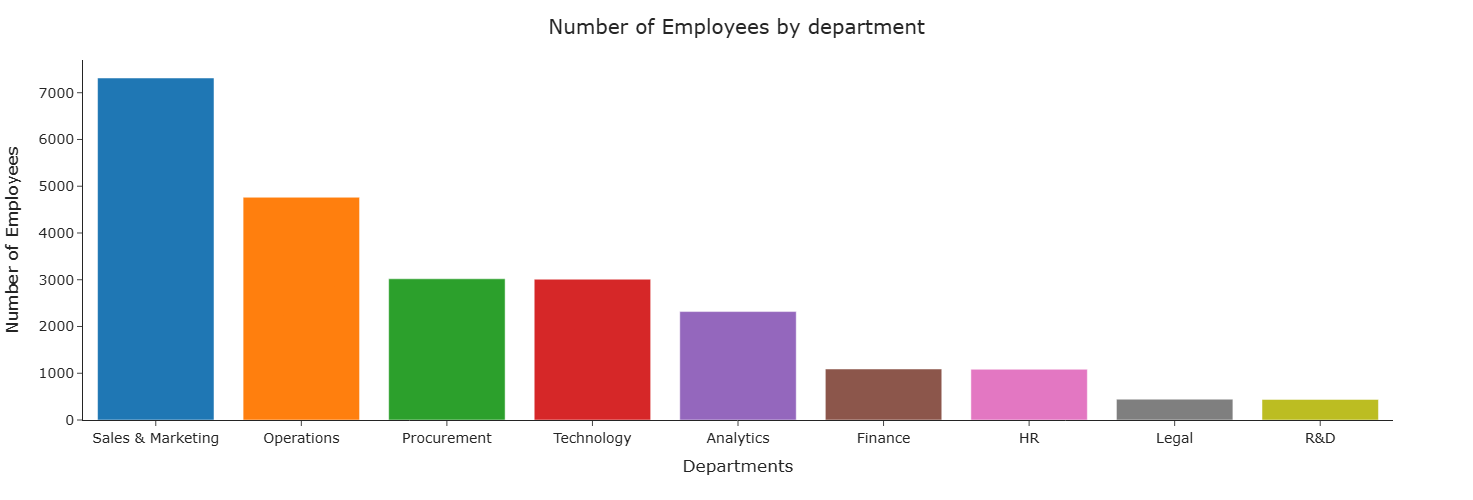

In [606]:
fig = px.bar(x = data['department'].value_counts().index, y = data['department'].value_counts(),
             color = data['department'].value_counts().index,
              template = 'simple_white')


fig.update_layout(
    xaxis_title="Departments",
    yaxis_title="Number of Employees",
    showlegend = False,
    height=500,
    width=1000 ,
    font = dict(size = 14),    
    title={
        'text': "Number of Employees by department",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

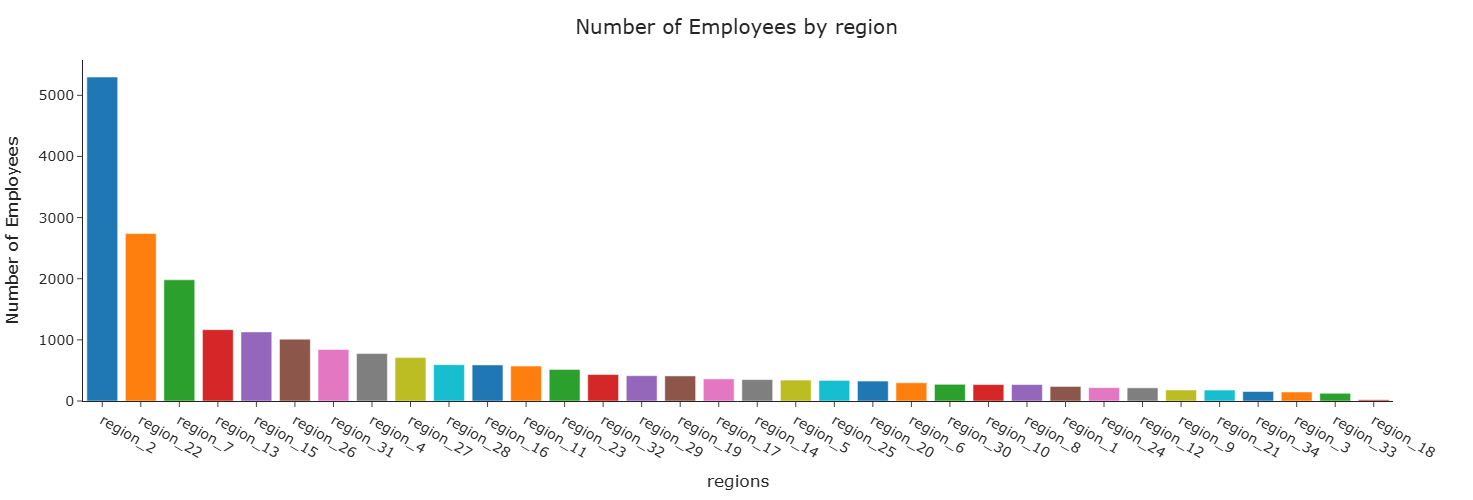

In [607]:
fig = px.bar(x = data['region'].value_counts().index, y = data['region'].value_counts(),
             color = data['region'].value_counts().index,
              template = 'simple_white')


fig.update_layout(
    xaxis_title="regions",
    yaxis_title="Number of Employees",
    showlegend = False,
    height=500,
    width=1450 ,
    xaxis_tickangle=30,
    font = dict(size = 14),    
    title={
        'text': "Number of Employees by region",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

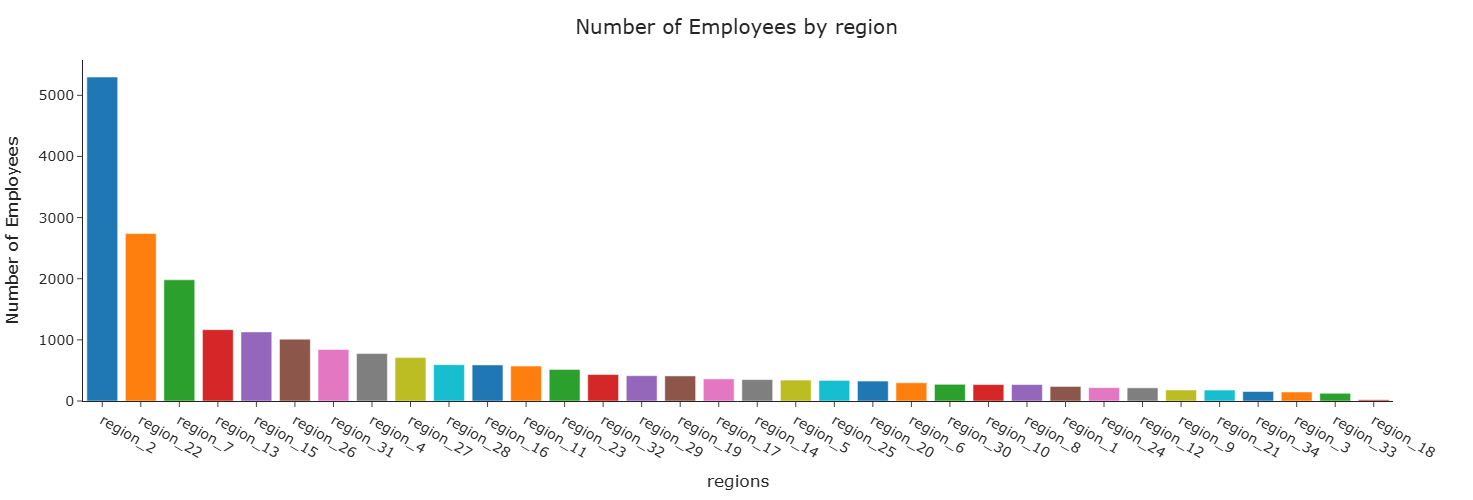

In [608]:
fig = px.bar(x = data['region'].value_counts().index, y = data['region'].value_counts(),
             color = data['region'].value_counts().index,
              template = 'simple_white')


fig.update_layout(
    xaxis_title="regions",
    yaxis_title="Number of Employees",
    showlegend = False,
    height=500,
    width=1450 ,
    xaxis_tickangle=30,
    font = dict(size = 14),    
    title={
        'text': "Number of Employees by region",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

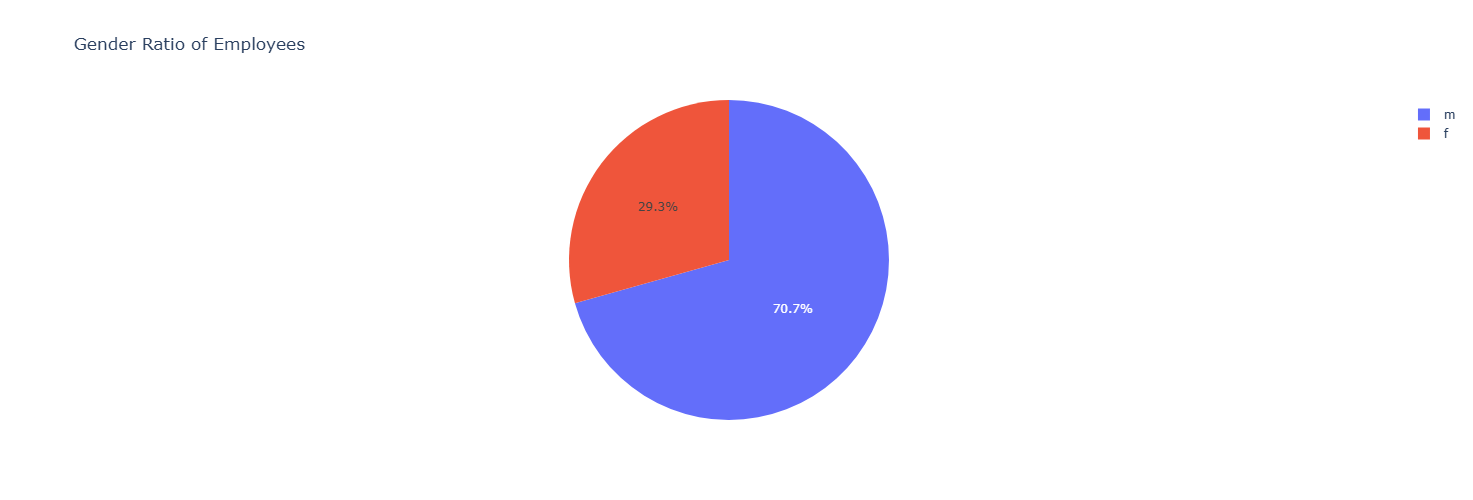

In [609]:
gender_counts = data['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

fig = px.pie(gender_counts, names='gender', values='count', title="Gender Ratio of Employees")


fig.update_layout(
    height=500,
    width=500 
    )

fig.show()

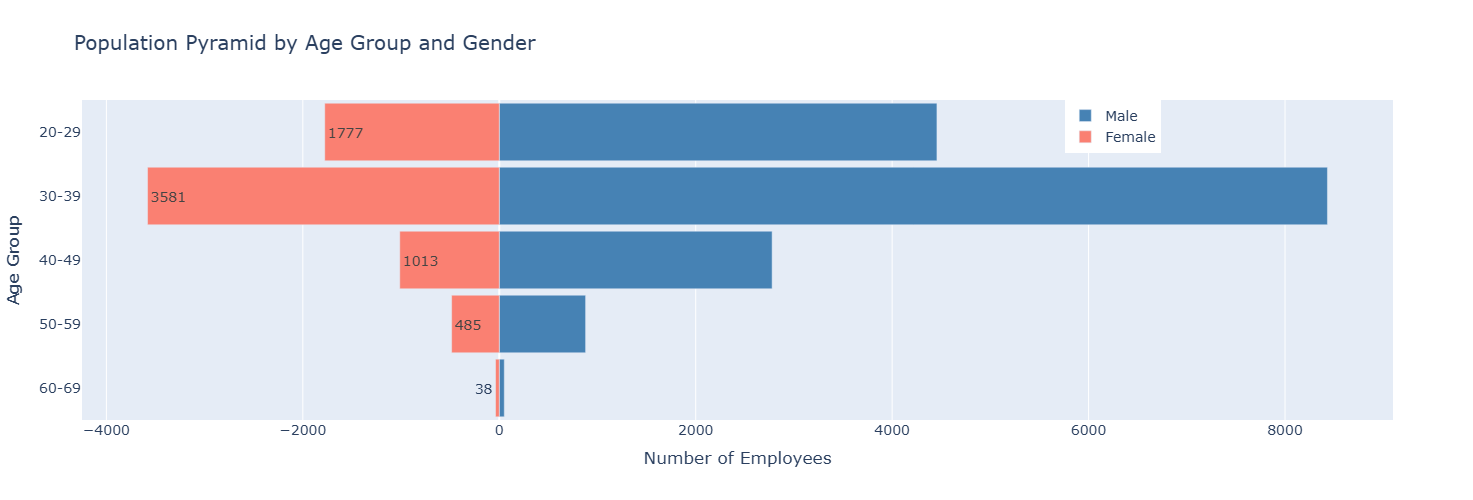

In [637]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Step 1: Define bins and labels
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

grouped = data.groupby(['age_group', 'gender'], observed=True).size().unstack(fill_value=0)
grouped = grouped.reindex(labels, fill_value=0)

male_counts = grouped['m']
female_counts = -grouped['f'] 

fig = go.Figure()
fig.add_trace(go.Bar(
    y=labels,
    x=male_counts,
    name='Male',
    orientation='h',
    marker_color='steelblue',
    hovertemplate='Male: %{x}<extra></extra>'
))

fig.add_trace(go.Bar(
    y=labels,
    x=female_counts,
    name='Female',
    orientation='h',
    marker_color='salmon',
    hovertemplate='Female: %{text}<extra></extra>',
    text=female_counts.abs().astype(int)
))

max_count = max(male_counts.max(), female_counts.abs().max())

fig.update_layout(
    title='Population Pyramid by Age Group and Gender',
    barmode='overlay',
    bargap=0.1,
    xaxis=dict(
        title='Number of Employees',
    ),
    yaxis=dict(
        title='Age Group',
        autorange='reversed'  
    ),
    legend=dict(x=0.75, y=1),
    font=dict(size=14),
    height=500
)

fig.show()


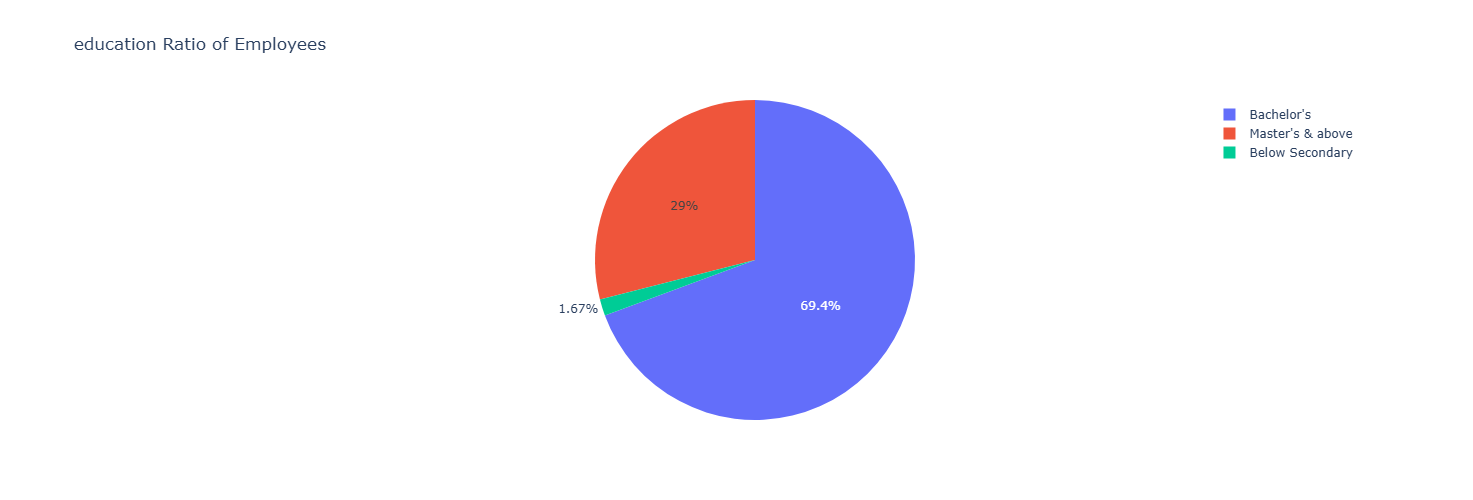

In [610]:

counts = data['education'].value_counts().reset_index()
counts.columns = ['education', 'count']

fig = px.pie(counts, names='education', values='count', title="education Ratio of Employees")


fig.update_layout(
    height=500,
    width=500 
    )

fig.show()

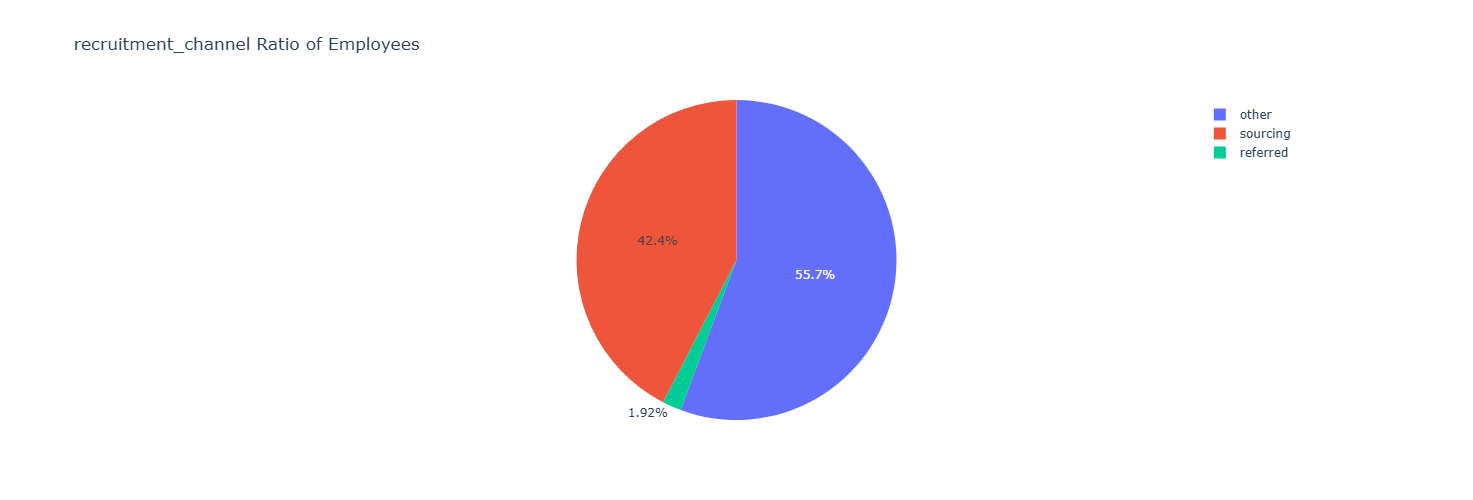

In [611]:

counts = data['recruitment_channel'].value_counts().reset_index()
counts.columns = ['recruitment_channel', 'count']

fig = px.pie(counts, names='recruitment_channel', values='count', title="recruitment_channel Ratio of Employees")


fig.update_layout(
    height=500,
    width=500 
    )

fig.show()

In [612]:
import pandas as pd


bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

data['age_group']



0        20-29
1        30-39
2        30-39
3        30-39
4        30-39
         ...  
23485    20-29
23486    30-39
23487    20-29
23488    20-29
23489    40-49
Name: age_group, Length: 23490, dtype: category
Categories (5, object): ['20-29' < '30-39' < '40-49' < '50-59' < '60-69']

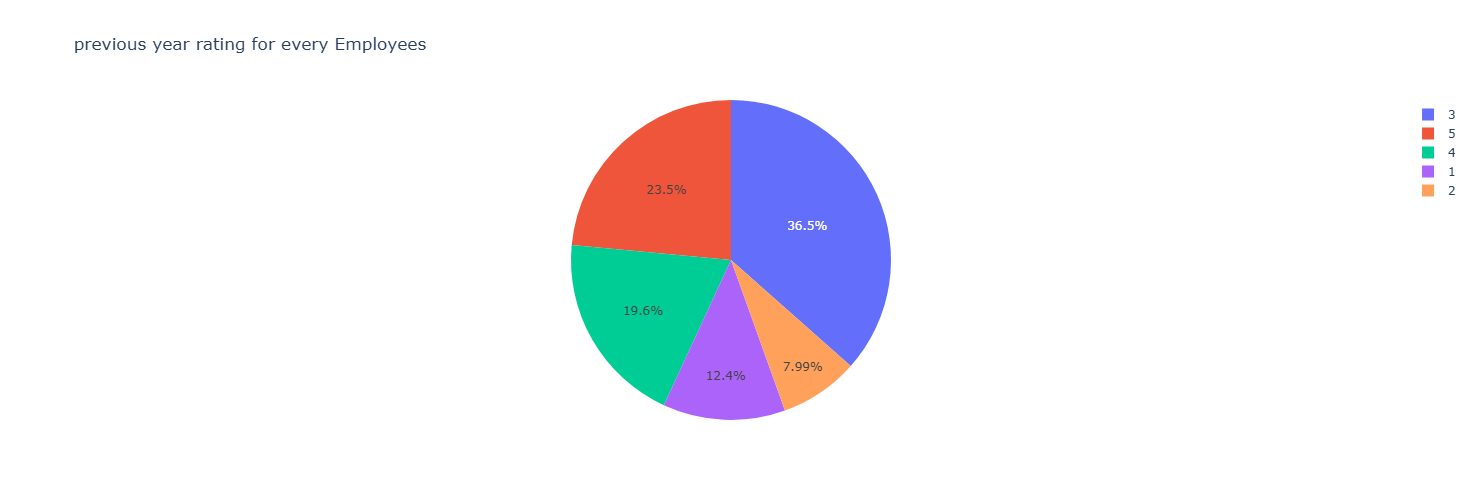

In [613]:


counts = data['previous_year_rating'].value_counts().reset_index()
counts.columns = ['previous_year_rating', 'count']

fig = px.pie(counts, names='previous_year_rating', values='count', title="previous year rating for every Employees")


fig.update_layout(
    height=500,
    width=500 
    )

fig.show()


In [614]:
data['previous_year_rating'].value_counts().reset_index()

,previous_year_rating,count
0,3.0,7921
1,5.0,5097
2,4.0,4249
3,1.0,2680
4,2.0,1731


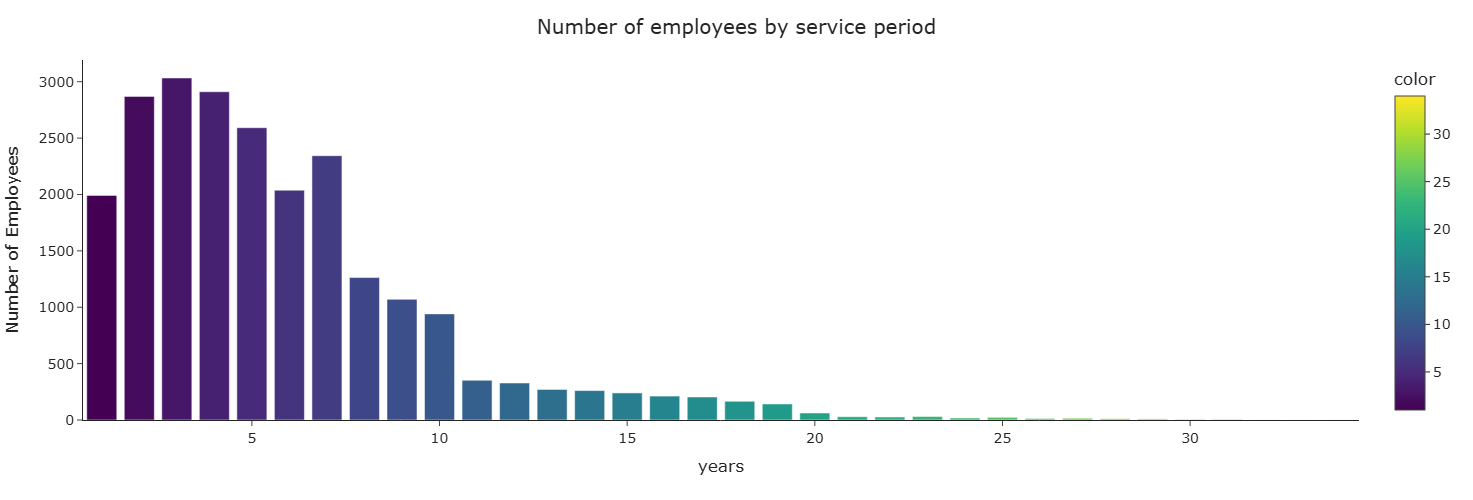

In [615]:
fig = px.bar(x = data['length_of_service'].value_counts().index, y = data['length_of_service'].value_counts(),
             color = data['length_of_service'].value_counts().index,
              template = 'simple_white')


fig.update_layout(
    xaxis_title="years",
    yaxis_title="Number of Employees",
    showlegend = False,
    height=500,
    width=1450 ,
    xaxis={'categoryorder': 'total ascending'},

    font = dict(size = 14),    
    title={
        'text': "Number of employees by service period",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()


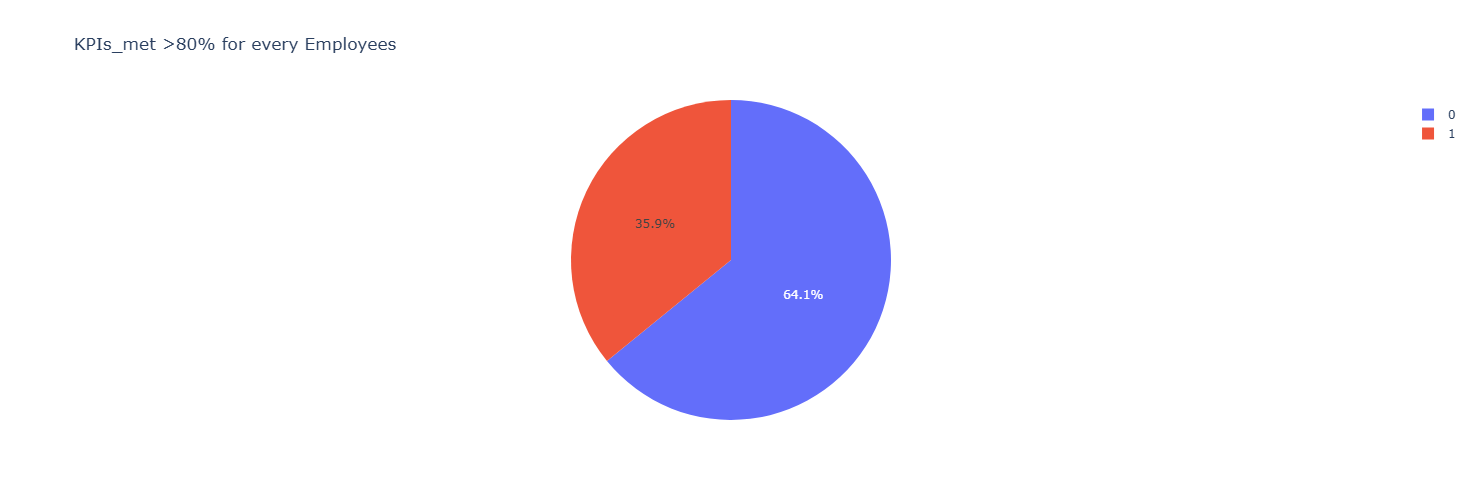

In [616]:


counts = data['KPIs_met >80%'].value_counts().reset_index()
counts.columns = ['KPIs_met >80%', 'count']

fig = px.pie(counts, names='KPIs_met >80%', values='count', title="KPIs_met >80% for every Employees")


fig.update_layout(
    height=500,
    width=500 
    )

fig.show()

In [617]:
unique_columns(data)

,Column,Unique Values
0,employee_id,23490
1,department,9
2,region,34
3,education,3
4,gender,2
5,recruitment_channel,3
6,no_of_trainings,9
7,age,41
8,previous_year_rating,5
9,length_of_service,34


In [618]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_group
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,20-29
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,30-39
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,30-39
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,30-39
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,30-39


<div style="text-align: center;height:50px;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 30px; color: #333;">
  KPI Analysis
</div>

In [649]:
data['education'] = data['education'].fillna('NA')

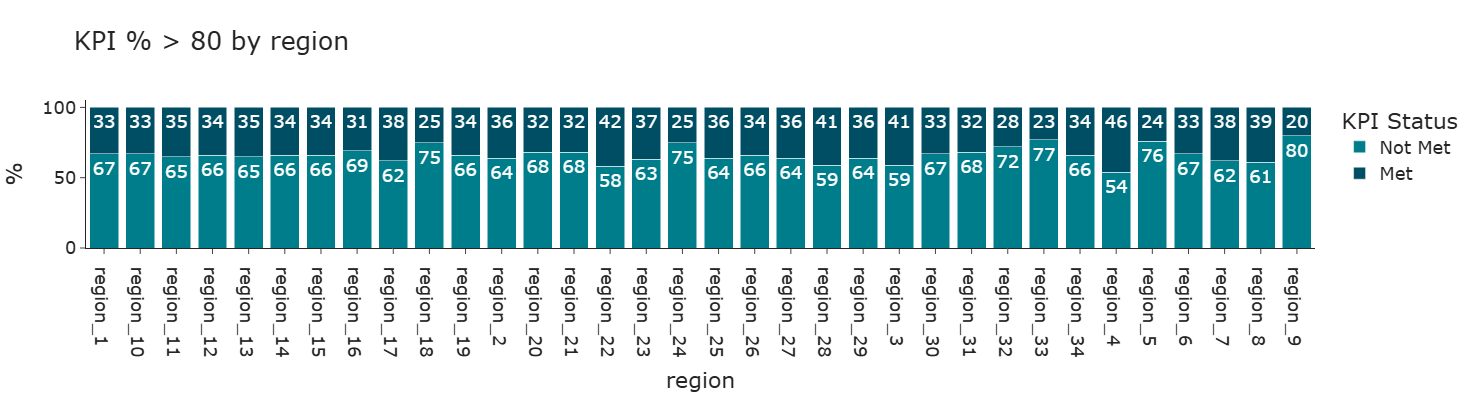

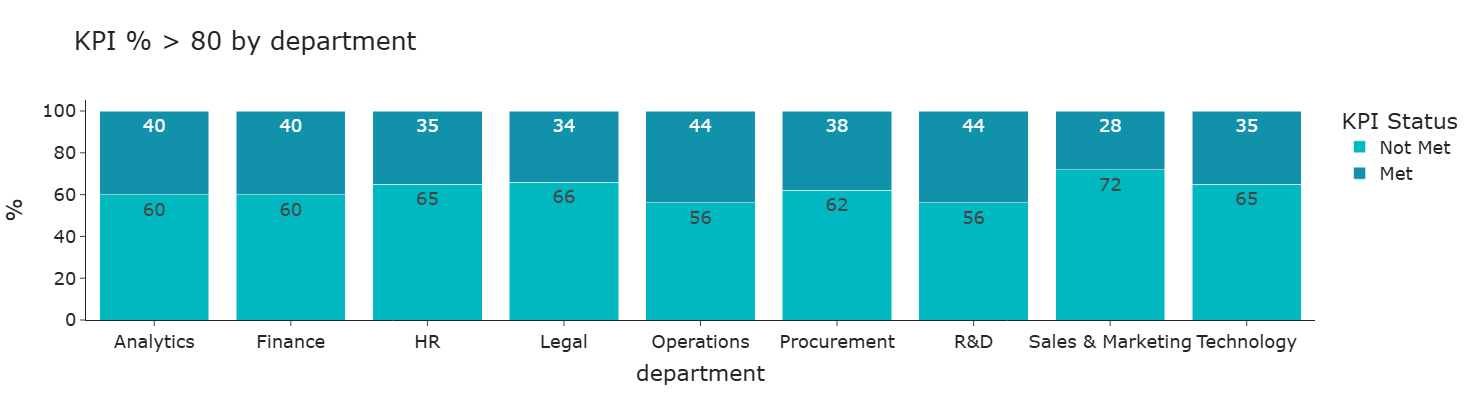

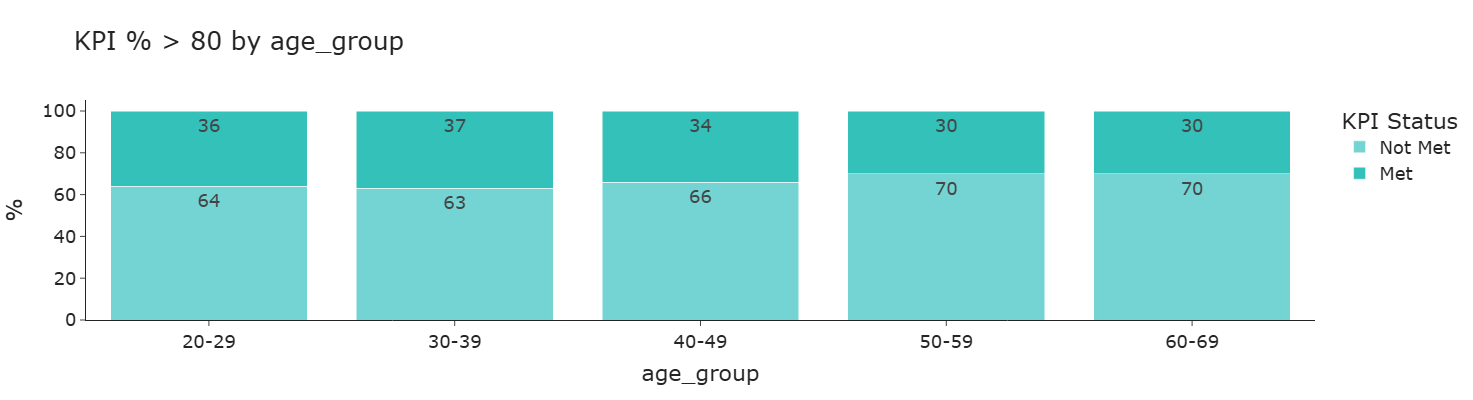

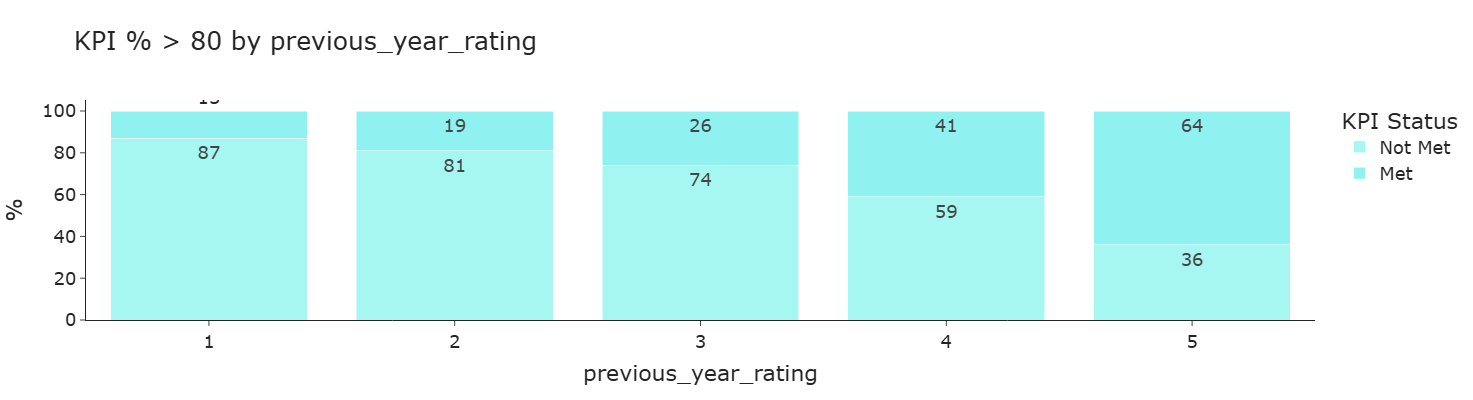

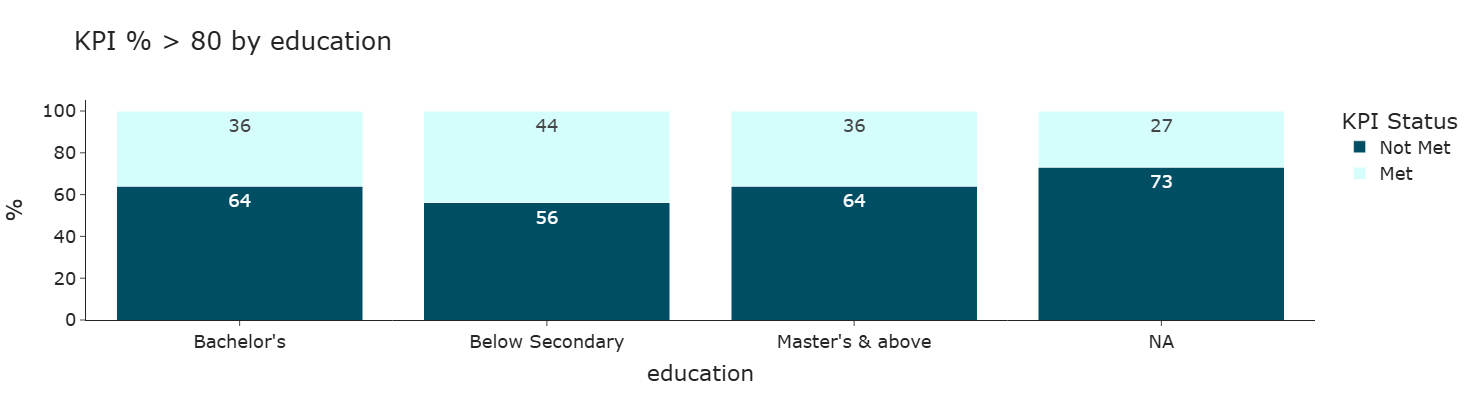

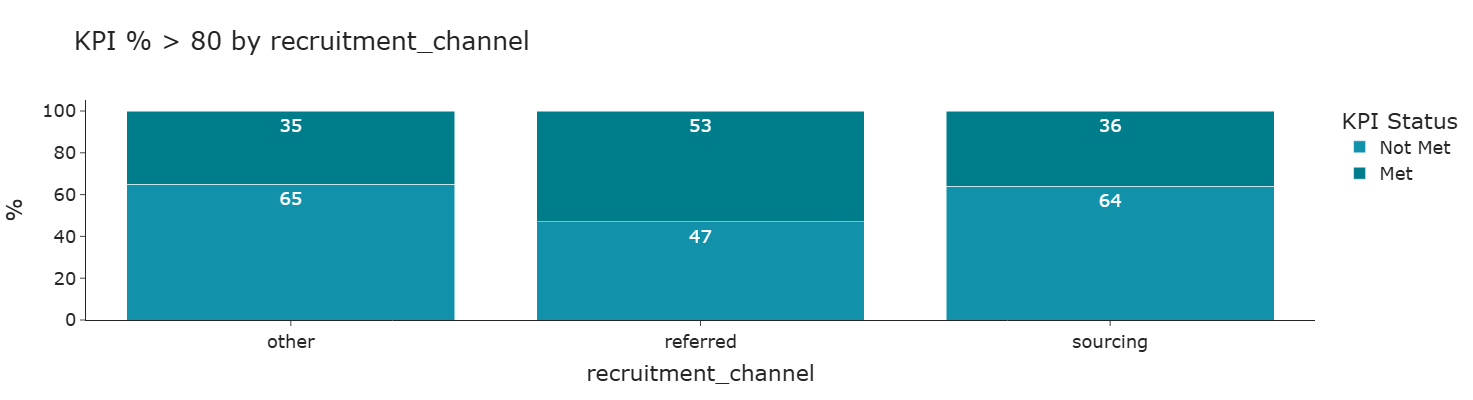

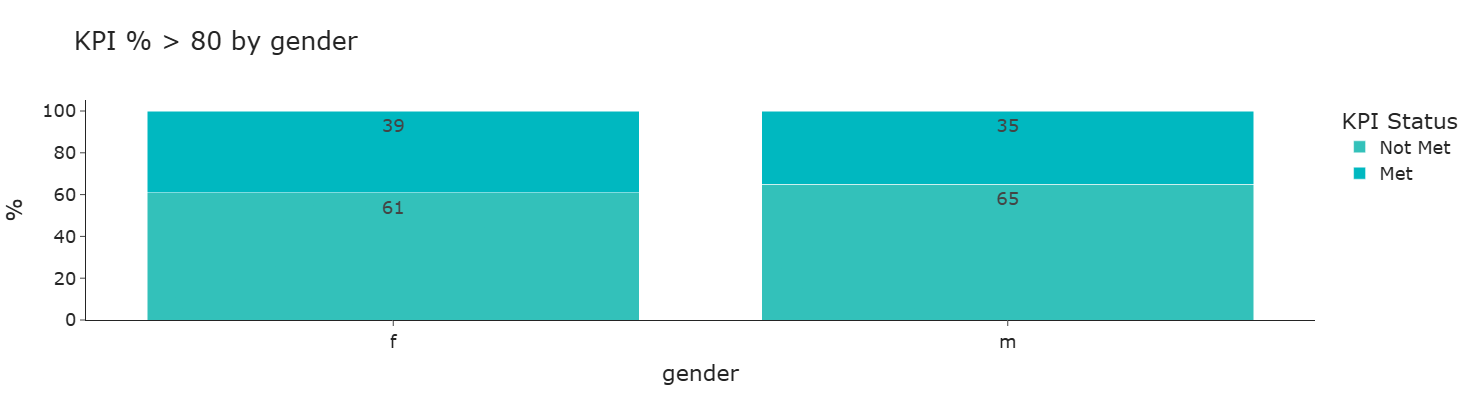

In [650]:
import pandas as pd
import plotly.express as px
from itertools import cycle

colors = [
    '#004E64', '#007D8A', '#1192AA', '#00B8C0',
    '#33C1BA', '#73D4D3', '#90F2F0', '#A6F7F2', '#D4FDFC'
]
color_cycle = cycle(colors)

all_fields = ['region', 'department', 'age_group', 'previous_year_rating',
              'education', 'recruitment_channel', 'gender']

for col in all_fields:
  
    kpi_counts = data.groupby([col, 'KPIs_met >80%'],observed=True).size().reset_index(name='count')

    kpi_counts['KPI_Status'] = kpi_counts['KPIs_met >80%'].map({0: 'Not Met', 1: 'Met'})

    total_per_group = kpi_counts.groupby(col,observed=True)['count'].transform('sum')
    kpi_counts['%'] = ((kpi_counts['count'] / total_per_group) * 100).round()

    color_met = next(color_cycle)
    color_not_met = next(color_cycle)

    
    color_map = {
        'Not Met': color_not_met,
        'Met': color_met,
    }
 
    fig = px.bar(
        kpi_counts,
        x=col,
        y='%',
        color='KPI_Status',
        text='%',
        barmode='stack',  
        title=f'KPI % > 80 by {col}',
        color_discrete_map=color_map,
        template = 'simple_white'
      
    )

    fig.update_layout(
        font=dict(size=18),
        legend_title_text='KPI Status',
        showlegend=True,
        height = 400
    )

    fig.show()
    print("\n\n")


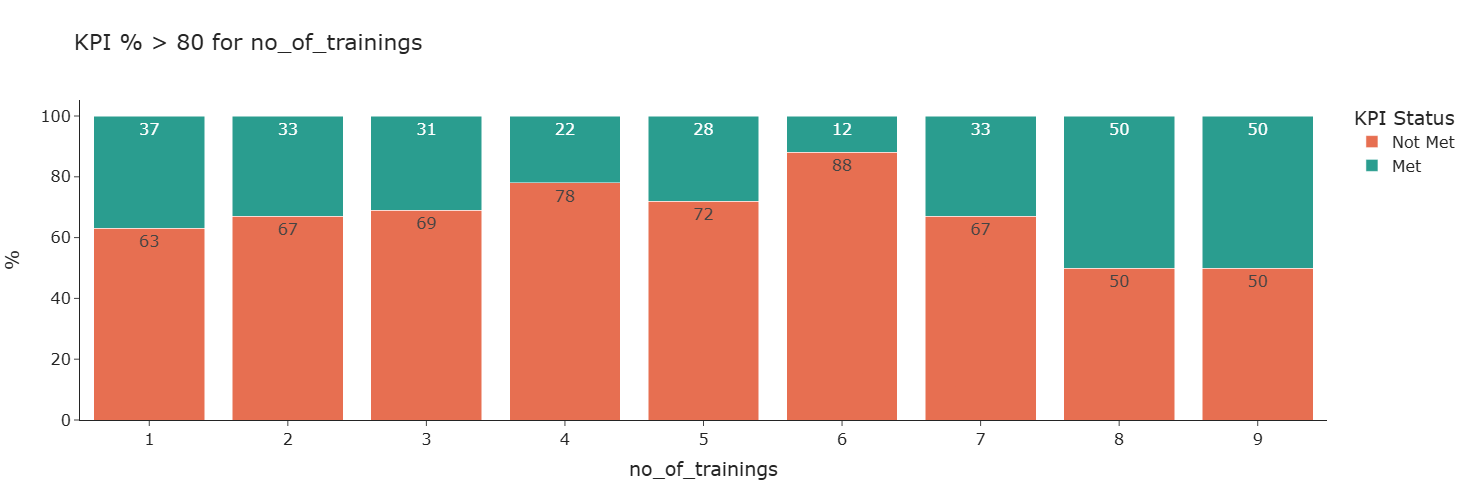

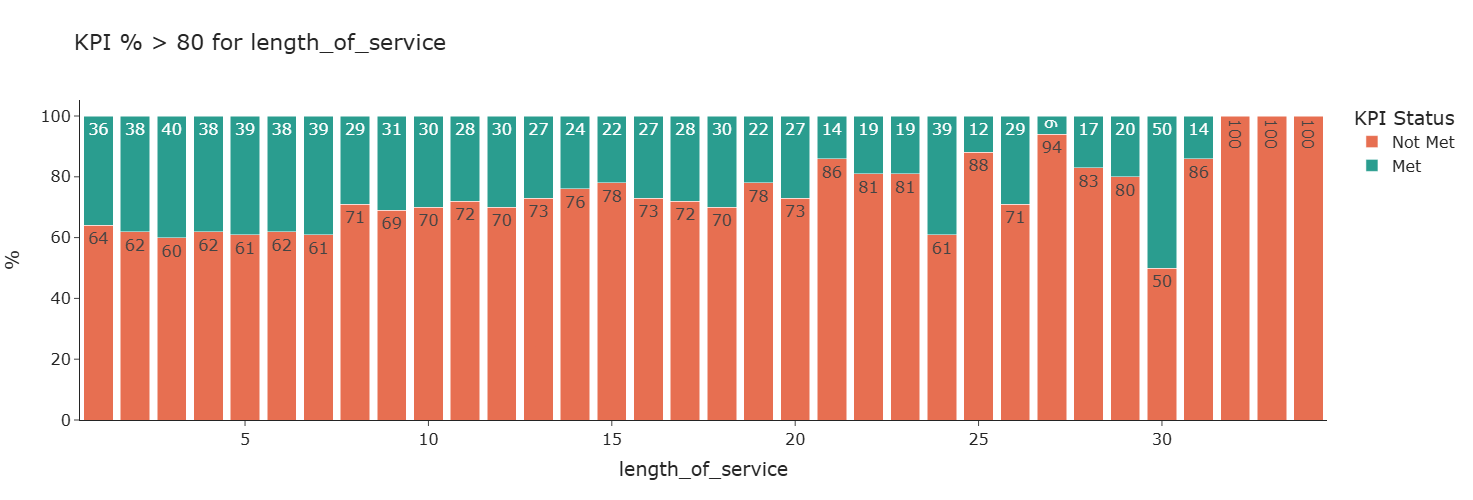

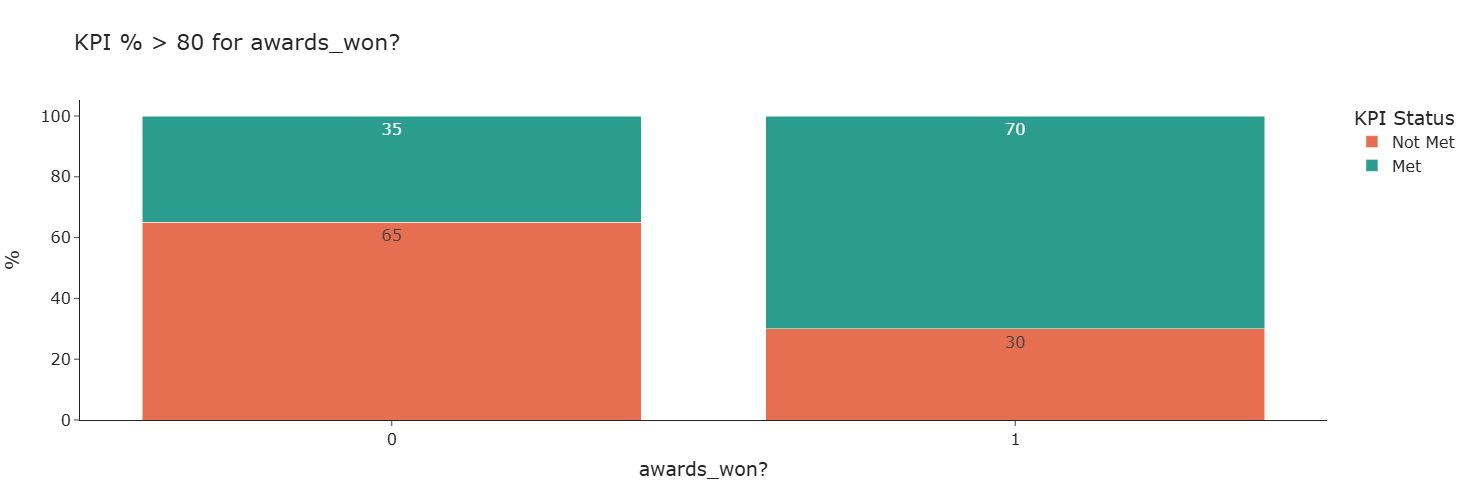

In [620]:
import plotly.express as px

all_fields = ['no_of_trainings', 'length_of_service', 'awards_won?']

for col in all_fields:
    kpi_counts = data.groupby([col, 'KPIs_met >80%']).size().reset_index(name='Count')

    kpi_counts['KPI_Status'] = kpi_counts['KPIs_met >80%'].map({0: 'Not Met', 1: 'Met'})

    total_per_group = kpi_counts.groupby(col)['Count'].transform('sum')
    kpi_counts['%'] = ((kpi_counts['Count'] / total_per_group) * 100).round()


    fig = px.bar(
        kpi_counts,
        x=col,
        y='%',
        color='KPI_Status', 
        text='%',
        barmode='stack',  
        title=f'KPI % > 80 for {col}',
        template = 'simple_white',
        color_discrete_map={
             'Met': '#2a9d8f',     # Blue
             'Not Met': '#e76f51'  # Orange
        }
    )

    fig.update_layout(
        font=dict(size=16),
        legend_title_text='KPI Status',
        height = 500
    )

    fig.show()
    print("\n\n")


In [635]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_group
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,20-29
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,30-39
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,30-39
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,30-39
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,30-39
